In [1]:
#Train, val, Test splitter
import train_pytorch
import prepare_dataset
import random
import time 
from collections import Counter
import os
import numpy as np
import shutil
#os.chdir("/Users/kjartan/Documents/CompCogSci3/") 
os.chdir(r"C:\Users\kjart\OneDrive\Dokumenter\KU\3. semester\Cog sci 3\CompCogSci3")

In [2]:
language = "EN"
unsorted_data_dir = "raw_data/derivatives/"
annotation_file = f"raw_data/annotation/{language}/lpp{language}_word_information.csv"
random.seed(1234)

prepare_dataset.clear_data_dir()
##the split is (0.8,0.1,0.1)
prepare_dataset.fill_data_dir(unsorted_data_dir, prepare_dataset.config2, language)



Delete the contents of data dir?...
[Y/N]?
Done removing folders

Retriving data...
Done retriving data
Moving data into folders....
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-09_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-15_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-10_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-12_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-13_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-11_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-14_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivatives/sub-EN091\func\sub-EN091_task-lppEN_run-07_space-MNIColin27_desc-preproc_bold.nii.gz
raw_data/derivativ

In [12]:
#Move data back from aux_data/
for phase in os.listdir("aux_data/"):
    for run in range(9):
        path = f"aux_data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            file_path = f"data/{phase}/{run}/{language}/{file}"
            shutil.move(f"aux_data/{phase}/{run}/{language}/{file}",file_path)
            #time.sleep(0.00001)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'aux_data/Test/0/CN/'

In [3]:
pos = "NOUN"

oov = "-1"
binary = False

prepare_dataset.prepare_labels(annotation_file, "data/", language, pos=pos, oov=oov)

#binary = prepare_dataset.convert_to_binary_labels("data/", oov, language)

{0: ['years', 'picture', 'forest', 'stories', 'boa', 'constrictor', 'copy', 'drawing', 'constrictors', 'prey', '-1', '-1', 'digestion', 'digestion', 'adventures', 'turn', 'pencil', 'number', 'number', '-1', 'grownups', 'drawing', '-1', 'hat', 'drawing', 'hat', 'elephant', 'elephant', 'constrictor', 'grownups', 'things', 'drawing', 'number', 'grownups', 'boa', 'constrictors', '-1', 'history', '-1', 'age', 'age', 'painter', 'failure', 'number', 'grownups', '-1', 'children', 'things', '-1', 'profession', 'airplanes', 'places', 'geography', 'geography', 'glance', 'glance', 'night', 'night', 'contact', 'consequence', 'lot', 'grownups', '-1', 'opinion', '-1', '-1', 'experiment', 'one', '-1', 'understanding', 'understanding', 'hat', 'hat', 'constrictors', 'forests', 'stars', 'level', '-1', 'neckties', 'grownup', 'man', '-1', '-1', 'breakdown', 'years', '-1', 'engine', 'passengers', 'passengers', '-1', 'repairs', 'death', 'water', 'week', 'sand', 'miles', 'habitation', 'sailor', 'ocean', 'surp

In [5]:
all_labels = []
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                    for l in lines:
                        all_labels.append(l.strip("\n"))

from collections import Counter
import codecs

most_common = Counter(all_labels).most_common()
label_dict = {}
with codecs.open("label_dict.txt", "r", encoding="utf-8") as f:
    for i in f.readlines():
        k = i.split("=")
        label_dict[k[1].strip("\n ")] = k[0]
most_common_lemmas = []
for i in range(len(most_common)):
    lbl = most_common[i][0]
    most_common_lemmas.append((label_dict[lbl], most_common[i][1]))

vocab15 = []
off_set = 2
for w, _ in most_common_lemmas[off_set:15+off_set]: #top 15 words
    vocab15.append(w.strip())
    
print(vocab15)
print(most_common_lemmas[off_set:15+off_set])

['planet', 'flower', 'stars', 'sheep', 'king', 'morning', 'time', 'day', 'geographer', 'grownups', 'one', 'water', 'friend', 'men', 'man']
[('planet ', 1770), ('flower ', 1350), ('stars ', 1230), ('sheep ', 990), ('king ', 870), ('morning ', 810), ('time ', 750), ('day ', 630), ('geographer ', 600), ('grownups ', 570), ('one ', 540), ('water ', 540), ('friend ', 510), ('men ', 510), ('man ', 480)]


In [6]:
vocab = vocab15
prepare_dataset.prepare_handpicked_labels(annotation_file, "data/", vocab, oov=oov)

{0: ['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'one', '-1', 'grownups', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'grownups', '-1', '-1', '-1', 'grownups', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'one', 'grownups', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'grownups', '-1', '-1', 'one', '-1', '-1', 'one', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'stars', '-1', '-1', '-1', '-1', 'man', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'water', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'sheep', 'sheep', 'sheep', '-1', '-1', '-1', '-1', 'man', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'grownups', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'sheep', '-1', 'one', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'sheep', '

In [7]:
#Exclude data that corresponds to oov
with codecs.open("label_dict.txt", "r", encoding="utf-8") as f:
    for i in f.readlines():
        k = i.split("=")
        if k[0].strip() == oov:
            label_2_remove = int(k[1].strip("\n "))
            break
print(label_2_remove)
labels_dict = {}
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                labels = np.loadtxt(f"data/{i}/{run}/{language}/labels.txt")
                labels_dict[run] = labels

exclusion_idxs = {k:[] for k in range(9)}

for run in labels_dict.keys():
    for idx, label in enumerate(labels_dict[run]):
        if label==label_2_remove:
            exclusion_idxs[run].append(idx)


for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                with open(path, "w") as f:
                    for line in lines:
                        if line.strip("\n ") != str(label_2_remove):
                            f.write(line)

count = 0
for phase in os.listdir("data/"):
    for run in range(9):
        path = f"data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            if file.endswith(".txt"):
                continue
            file_path = f"data/{phase}/{run}/{language}/{file}"
            idx = file.split("_")[-1][:-4]
            if int(idx) in exclusion_idxs[run]:
                count +=1 
                dest = f"aux_data/{phase}/{run}/{language}/"
                if not os.path.exists(dest):
                    os.makedirs(dest)
                shutil.move(file_path, f"aux_data/{phase}/{run}/{language}/")
                #time.sleep(0.00001)
print("moved ", count, " files")


2
moved  0  files


In [7]:

def count_files():
    counts = {}
    # Iterate directory
    for phase in os.listdir("data"):
        if os.path.isdir("data/"+phase):
            count=0
            for run in os.listdir(f"data/{phase}/"):
                for file in os.listdir(f"data/{phase}/{run}/{language}"):
                    if file.endswith(".npy"):
                        count += 1
        counts[phase] = count
    return counts

count_files()

{'Test': 4328, 'Train': 76206, 'Val': 8793}

In [8]:
import json
with codecs.open("config_stats.txt", "a", encoding="utf-8") as f:
    f.write("\n")
    for i in most_common_lemmas[3:18]:
        f.write(str(i) + ", ")
    f.write("\n")
    f.write(json.dumps(count_files()))
    f.write("\n")
f.close()

In [10]:
batch_size=50
config = f"config1_{language}_top15{pos}"
train_pytorch.train(binary=False, batch_size = batch_size, num_epochs = 6, config=config, model = "2d")

2022-12-07 19:54:18.589418


RuntimeError: false INTERNAL ASSERT FAILED at "C:\\cb\\pytorch_1000000000000\\work\\c10/cuda/CUDAGraphsC10Utils.h":74, please report a bug to PyTorch. Unknown CUDA graph CaptureStatus36

16


  0%|          | 0/38 [00:00<?, ?it/s]

..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
Test Accuracy: 0.1554


(M2DCNN(
   (up_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(73, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
       (5): mish()
       (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (front_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(90, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)

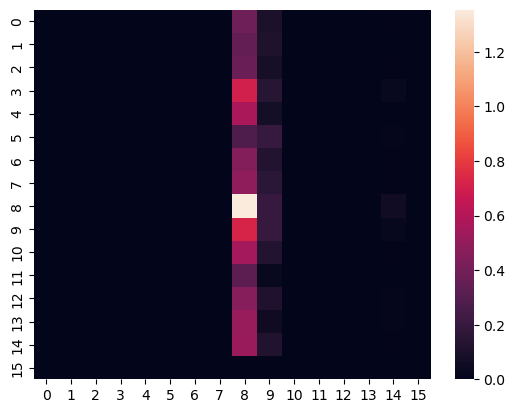

In [19]:
import model_m2dcnn as model
from torch.utils.data import DataLoader
from dataset import lpp_Dataset

batch_size = 50
binary = False
test_dataloader = DataLoader(lpp_Dataset("data/Test/"), batch_size=batch_size, shuffle=False)
if binary:
        nb_classes = 2
else:
    with open("label_dict.txt", "r") as f:
        nb_classes = len(f.readlines())
        f.close()
print(nb_classes)
train_pytorch.test(model.M2DCNN(numClass=nb_classes, numFeatues=30880, DIMX=74, DIMY=90, DIMZ=73), config,f"results/{config}_weights.pth", nb_classes, test_dataloader)

In [3]:
all = [1593,1215,1107,891,783,729,675,567,540,512,486,486,459,432]

In [6]:
tot = sum(all)
prob = 0
for i in all:
    prob += (i/tot)**2

print(prob)

0.0854703630077295


In [ ]:
def calc_baseline(lbl = "data/Test/", language = "EN"):
    prob = 0
    for i in range(9):
        path = lbl +"/"+ i + "/" + language
        if len(os.listdir(path))>1:
            with open(path + "/labels.txt", "r") as f:
                